In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import seaborn as sns
from wordcloud import WordCloud   


In [62]:
net_df = pd.read_csv("netflix.csv")

net_df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [63]:
net_df.shape


(7787, 12)

In [64]:
net_df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [65]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', 1000)  

In [66]:
net_df.isnull()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,False,False,False,False,False,False,False,False,False,False,False,False
7783,False,False,False,False,False,False,False,False,False,False,False,False
7784,False,False,False,True,False,True,False,False,False,False,False,False
7785,False,False,False,True,False,False,False,False,False,False,False,False


In [67]:
net_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [68]:
net_df['director'] = net_df['director'].fillna('Unknown')
net_df['cast'] = net_df['cast'].fillna('Unknown')

In [69]:
net_df.isnull().sum()

show_id           0
type              0
title             0
director          0
cast              0
country         507
date_added       10
release_year      0
rating            7
duration          0
listed_in         0
description       0
dtype: int64

In [70]:
net_df['country']

0                                                  Brazil
1                                                  Mexico
2                                               Singapore
3                                           United States
4                                           United States
                              ...                        
7782    Sweden, Czech Republic, United Kingdom, Denmar...
7783                                                India
7784                                                  NaN
7785                                            Australia
7786                United Kingdom, Canada, United States
Name: country, Length: 7787, dtype: object

In [71]:
mode_cntry = net_df['country'].mode()[0]
net_df['country'] = net_df['country'].fillna(mode_cntry)

In [72]:
net_df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           7
duration         0
listed_in        0
description      0
dtype: int64

In [73]:
net_df.dropna(subset=['date_added','rating'],inplace=True)

In [74]:
net_df.isnull().sum()   

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [75]:
net_df['date_added'] = pd.to_datetime(net_df['date_added'],format='mixed' , dayfirst=False)

In [76]:
net_df['year_added'] = net_df['date_added'].dt.year
net_df['month_added'] = net_df['date_added'].dt.month   

In [77]:
net_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1


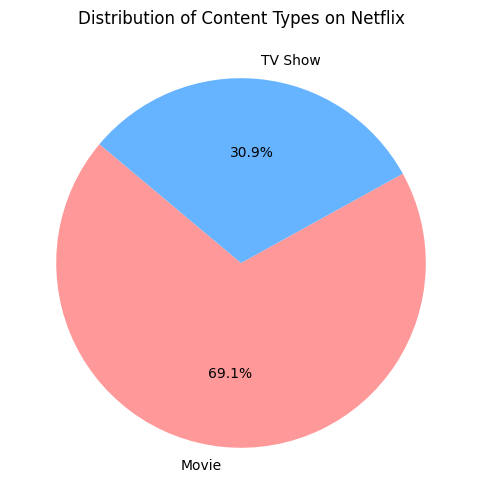

In [78]:
plt.figure(figsize=(8,6))
type_cnts = net_df['type'].value_counts()
plt.pie(type_cnts, labels=type_cnts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Distribution of Content Types on Netflix')
plt.ylabel('')
plt.show()

<Figure size 1400x800 with 0 Axes>

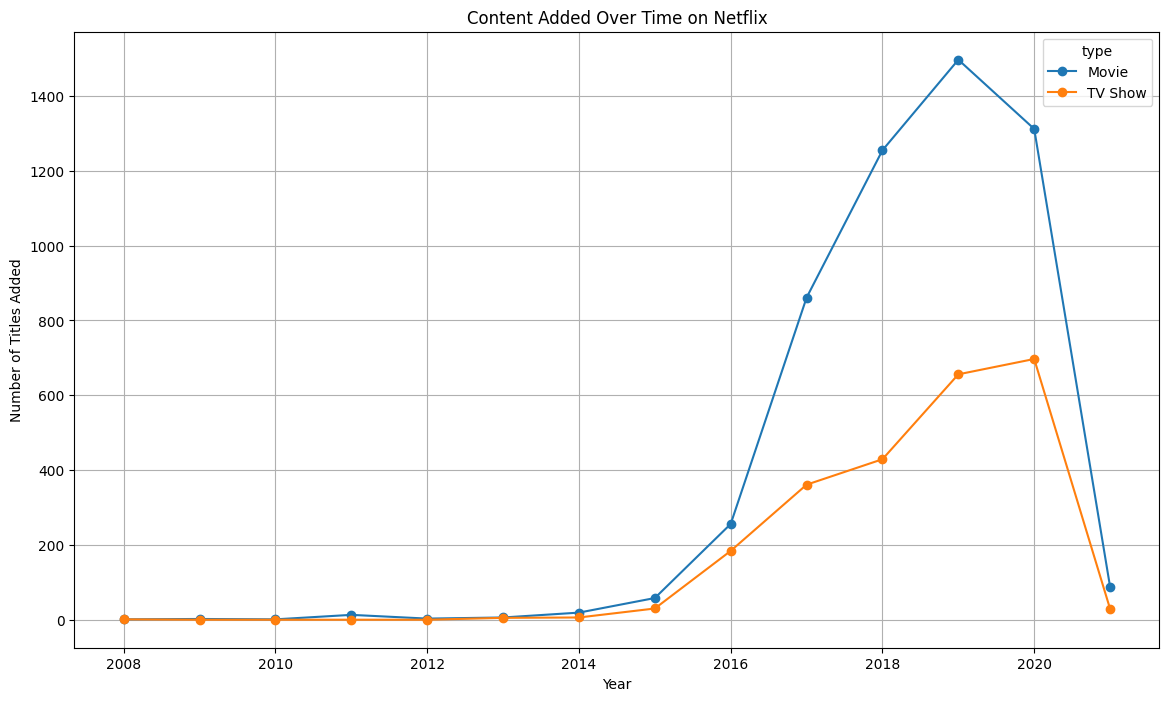

In [79]:
plt.figure(figsize=(14,8))
content_added_over_time.plot(kind='line', marker='o', figsize=(14,8))
plt.title('Content Added Over Time on Netflix')
plt.xlabel('Year')  
plt.ylabel('Number of Titles Added')
plt.grid(True)  
plt.show()

In [80]:
zoners = net_df.assign(zoners = net_df['listed_in'].str.split(', ')).explode('zoners')

In [81]:
top_zoners_cnt = zoners['zoners'].value_counts().reset_index()
top_zoners_cnt.columns = ['zoner', 'count']

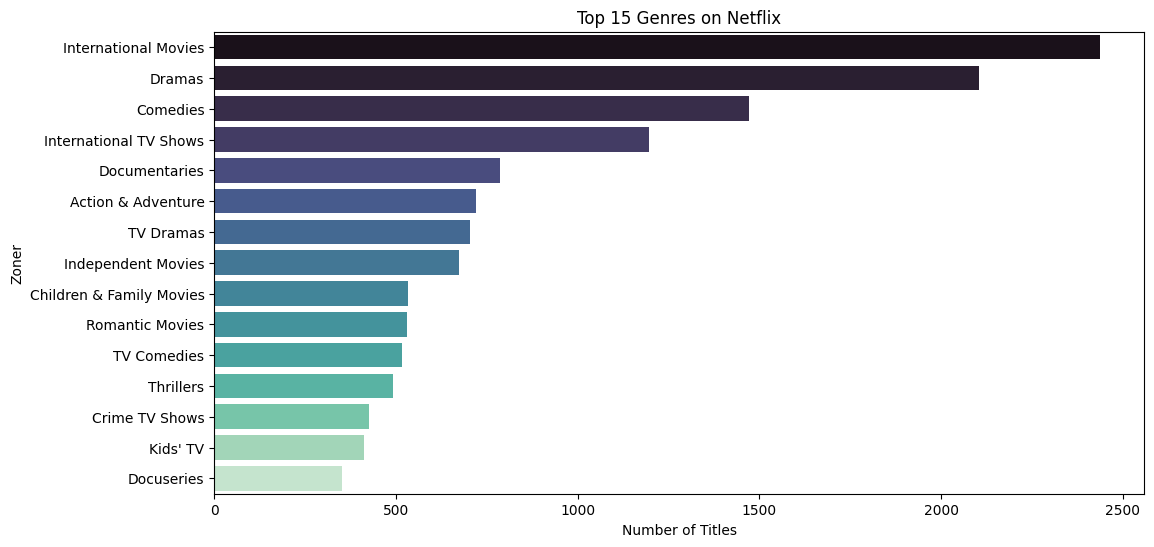

In [82]:
top_15 = top_zoners_cnt.head(15)

plt.figure(figsize=(12,6))
sns.barplot(data=top_15, x='count', y='zoner', palette='mako', hue='zoner', legend=False)   
plt.title('Top 15 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Zoner')
plt.show()

In [83]:
muvi_df = net_df[net_df['type'] == 'Movie'].copy()
show_df = net_df[net_df['type'] == 'TV Show'].copy()

In [84]:
muvi_df['duration_mins'] = muvi_df['duration'].str.replace(' min','').astype(int)
show_df['num_seasons'] = show_df['duration'].str.replace(' Seasons','').str.replace(' Season','').astype(int)

<Axes: xlabel='num_seasons', ylabel='count'>

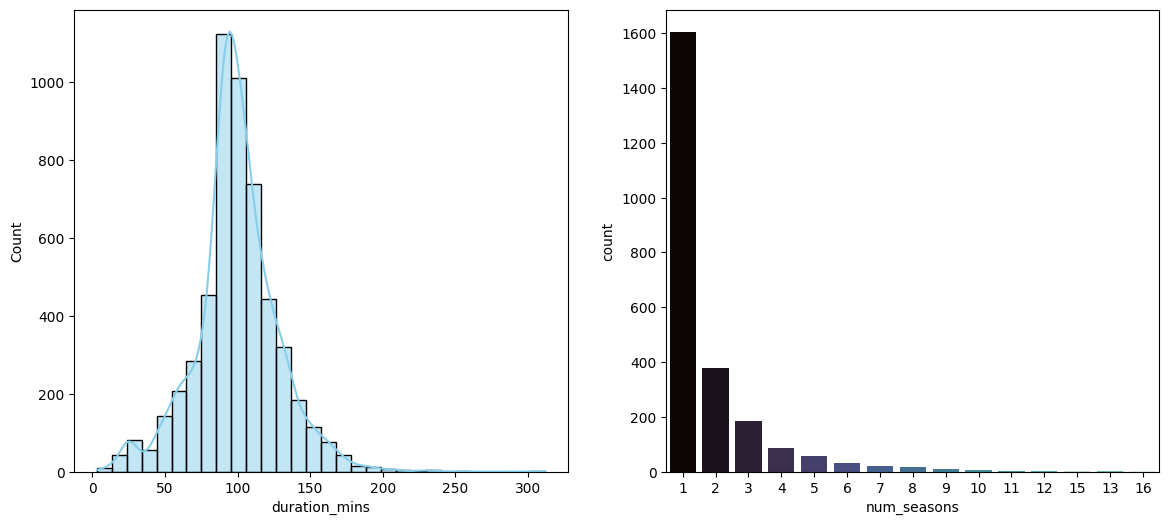

In [85]:
fig , axes = plt.subplots(1,2, figsize=(14,6))
sns.histplot(ax=axes[0], data=muvi_df, x='duration_mins', bins=30,kde=True, color='skyblue')
sns.countplot(ax=axes[1], x='num_seasons',data=show_df, palette='mako',order=show_df['num_seasons'].value_counts().index,hue='num_seasons', legend=False)

In [86]:
cntries = net_df.assign(cntries = net_df['country'].str.split(', ')).explode('cntries')

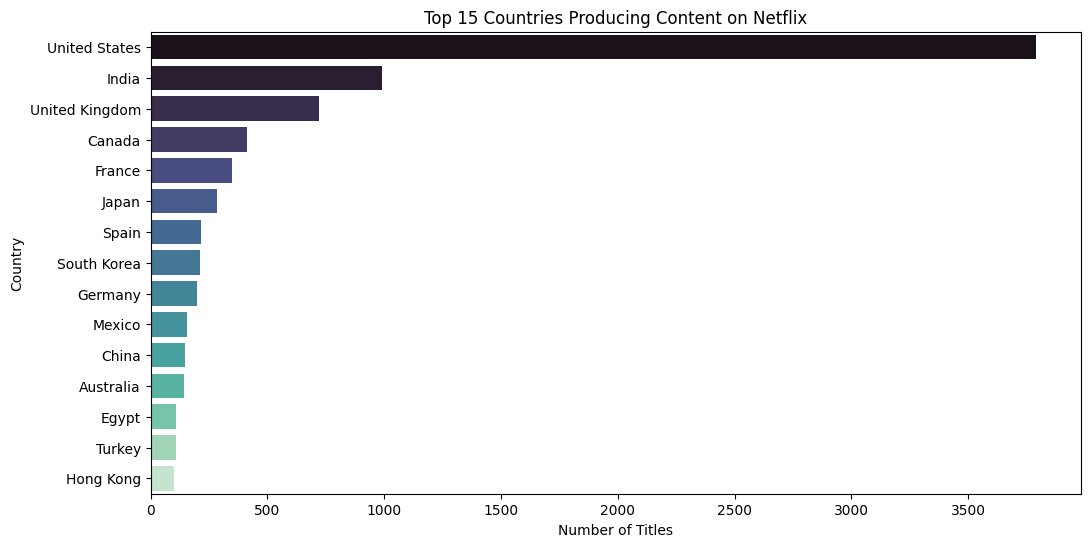

In [87]:
top_15_cntries = cntries['cntries'].value_counts().reset_index()
top_15_cntries.columns = ['country', 'count']
top_15_cntries = top_15_cntries.head(15)

plt.figure(figsize=(12,6))
sns.barplot(data=top_15_cntries, x='count', y='country', palette='mako', hue='country', legend=False)   
plt.title('Top 15 Countries Producing Content on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

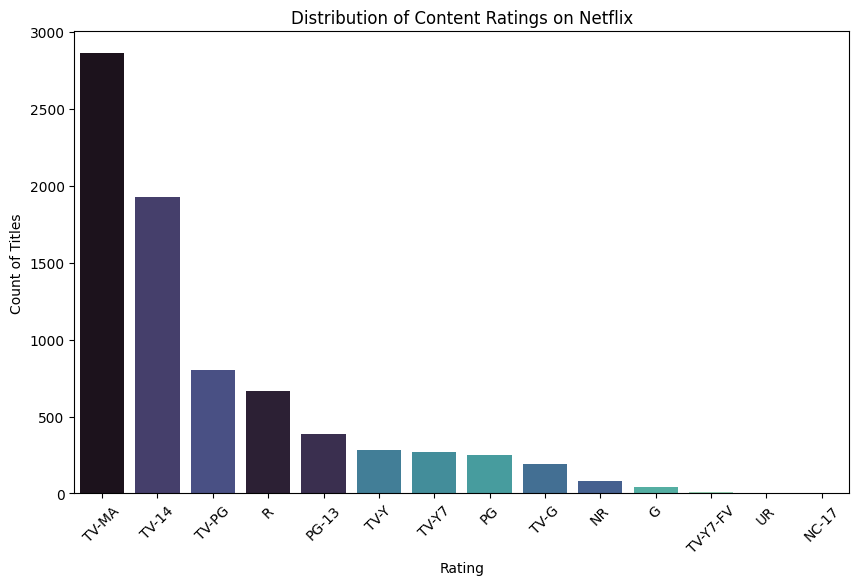

In [88]:
plt.figure(figsize=(10,6))
sns.countplot(data=net_df, x='rating', order=net_df['rating'].value_counts().index, palette='mako', hue='rating', legend=False)
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count of Titles')
plt.xticks(rotation=45)
plt.show()


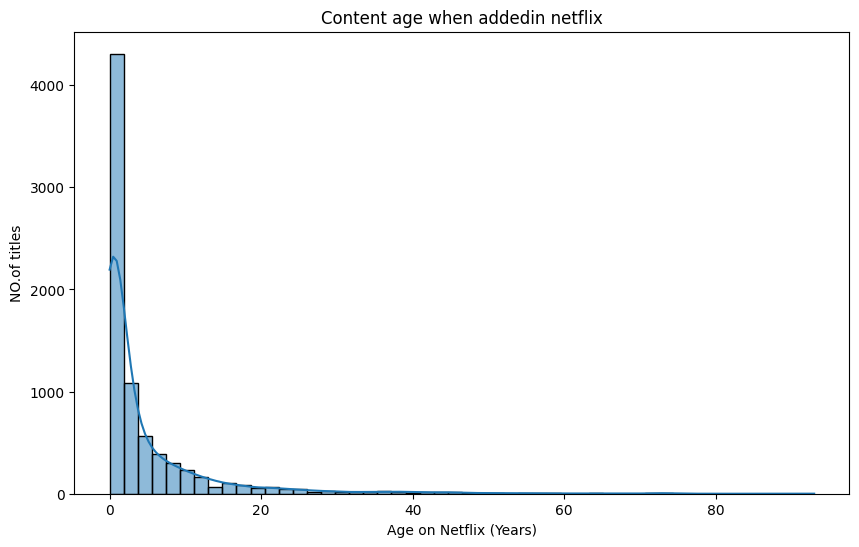

In [89]:
net_df['age_on_net'] = net_df['year_added'] - net_df['release_year']

content_age = net_df[net_df['age_on_net']>=0]

plt.figure(figsize=(10,6))
sns.histplot(data=content_age , x="age_on_net",bins=50,kde=True)
plt.title('Content age when addedin netflix')
plt.xlabel('Age on Netflix (Years)')
plt.ylabel('NO.of titles')
plt.show()

In [90]:
top_zoners = zoners['zoners'].value_counts().index[:5]
zoners_muvis = zoners[(zoners['type'] == 'Movie') & (zoners['zoners'].isin(top_zoners))].copy()

In [96]:
zoners_muvis['duration_mins'] = zoners_muvis['duration'].str.replace(' min','').astype(int)

C:\Users\K. SHIVAIAH\AppData\Local\Temp\ipykernel_19008\1724375818.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=zoners_muvis, x='zoners', y='duration_mins', palette='mako')


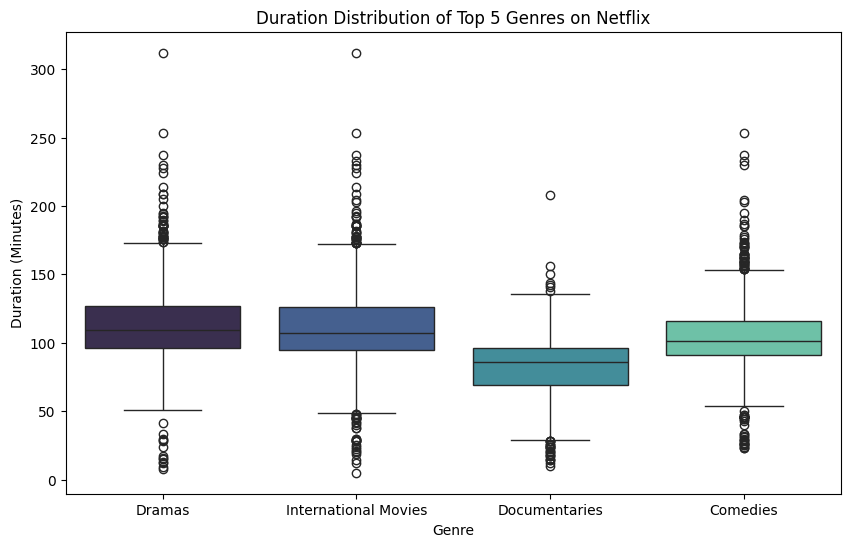

In [97]:
plt.figure(figsize=(10,6))
sns.boxplot(data=zoners_muvis, x='zoners', y='duration_mins', palette='mako')
plt.title('Duration Distribution of Top 5 Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Duration (Minutes)')
plt.show()

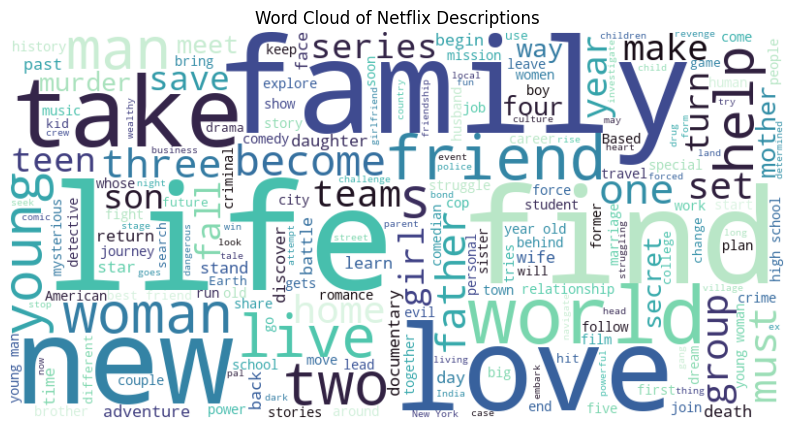

In [100]:
text = ' '.join(net_df['description'])
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='mako').generate(text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Netflix Descriptions')
plt.show()

Q1.Who are the top directors on Netflix?

director
Unknown                   2376
Raúl Campos, Jan Suter      18
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Youssef Chahine             12
Jay Chapman                 12
Steven Spielberg            10
David Dhawan                 9
Name: count, dtype: int64


C:\Users\K. SHIVAIAH\AppData\Local\Temp\ipykernel_19008\1823618443.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette="mako")


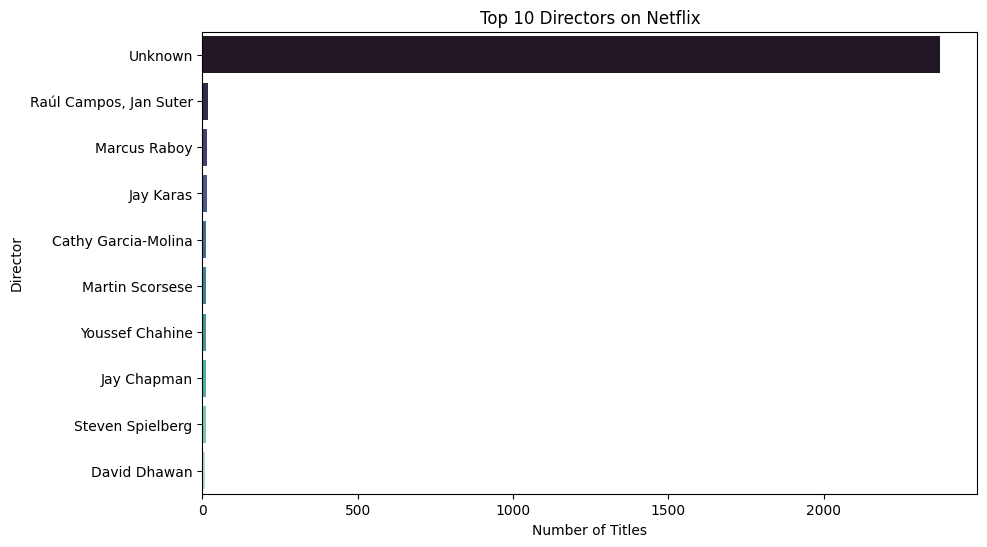

In [101]:

top_directors = net_df['director'].value_counts().head(10)


print(top_directors)


plt.figure(figsize=(10,6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette="mako")
plt.title("Top 10 Directors on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()


Key Insights:

Directors like Raúl Campos & Jan Suter (stand-up comedy), Marcus Raboy, and Jay Karas usually appear at the top.

This is because Netflix has a lot of comedy specials, and these directors handle many of them.

Q2: How has the distribution of content ratings changed over time?

In [102]:

ratings_by_year = net_df.groupby(['release_year', 'rating']).size().reset_index(name='count')

ratings_by_year.head()


,release_year,rating,count
0,1925,TV-14,1
1,1942,TV-14,2
2,1943,TV-PG,3
3,1944,TV-14,2
4,1944,TV-PG,1


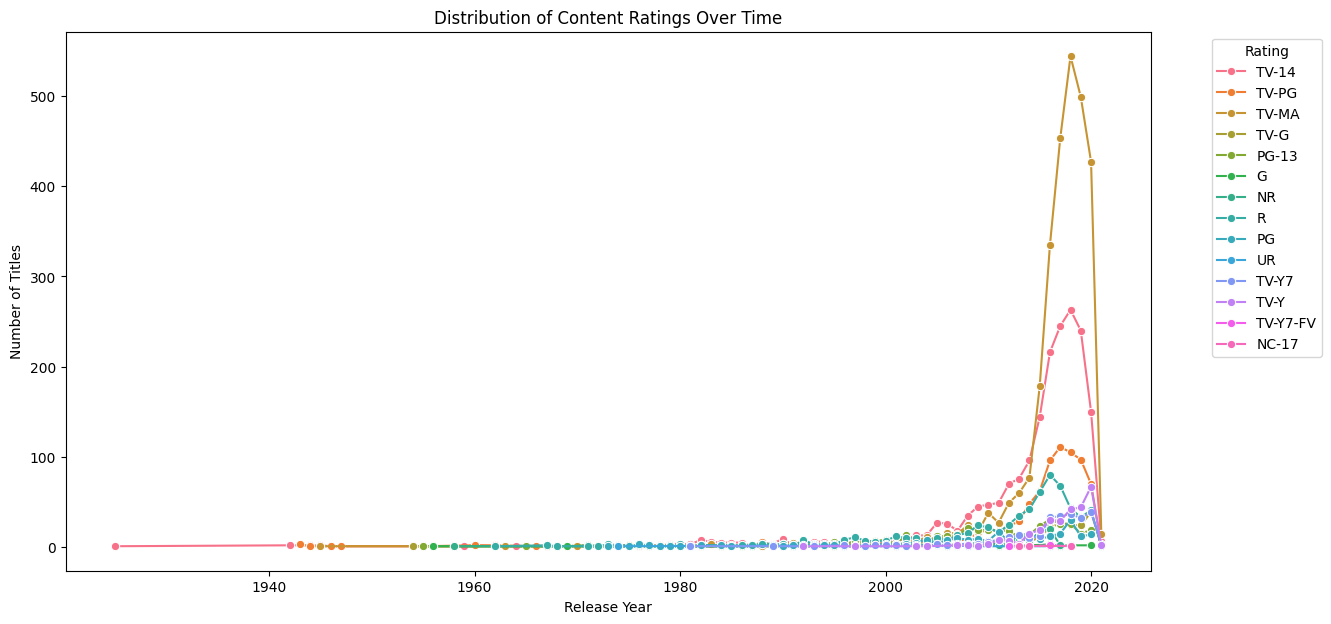

In [103]:
plt.figure(figsize=(14,7))
sns.lineplot(data=ratings_by_year, x='release_year', y='count', hue='rating', marker='o')
plt.title("Distribution of Content Ratings Over Time")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.legend(title="Rating", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Key Insights:

After ~2015, there is a clear surge in TV-MA content → aligns with Netflix Originals focusing on adult themes.

Ratings like TV-Y, TV-G, PG stay relatively small but consistent. Netflix adds kids’ content steadily but it’s not the main growth driver.

Q3: Relationship between content age and its type (Movie vs. TV Show)

In [107]:

content_type_by_year = net_df.groupby(['release_year', 'type']).size().reset_index(name='count')
content_type_by_year.head()


,release_year,type,count
0,1925,TV Show,1
1,1942,Movie,2
2,1943,Movie,3
3,1944,Movie,3
4,1945,Movie,3


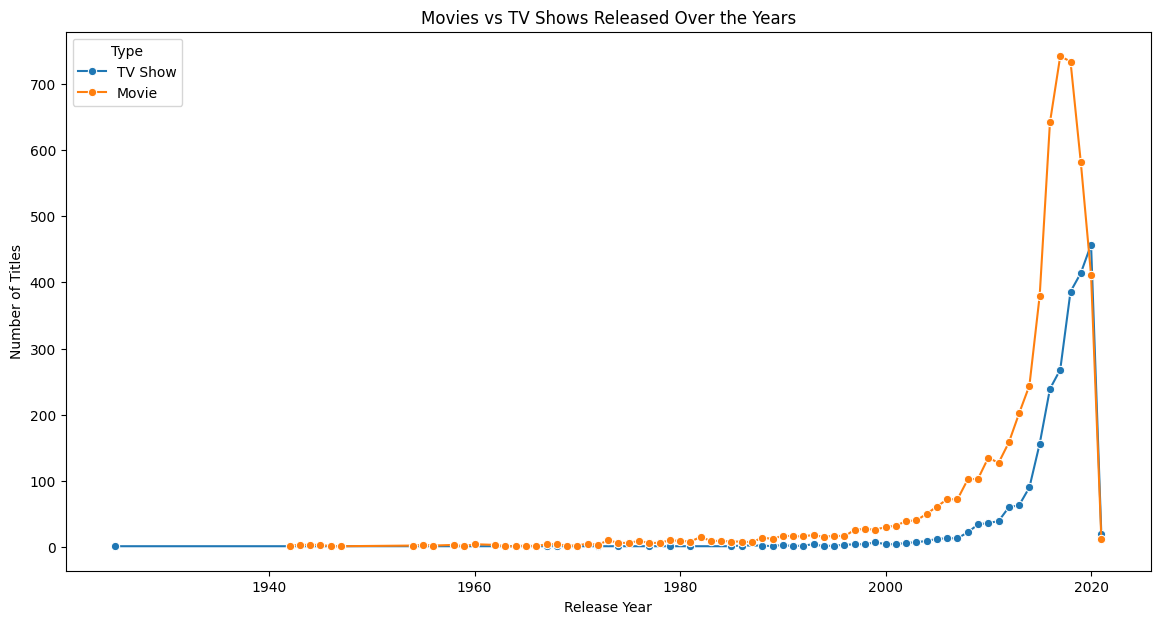

In [108]:
plt.figure(figsize=(14,7))
sns.lineplot(data=content_type_by_year, x='release_year', y='count', hue='type', marker='o')
plt.title("Movies vs TV Shows Released Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.legend(title="Type")
plt.show()


Key Insights:

efore ~2015, Netflix mostly had movies in its library

Big jump in TV Show releases when Netflix started producing Originals like Stranger Things (2016)

In the last few years, TV Shows and Movies are nearly balanced, showing Netflix’s strategy to push long-form content (TV shows keep subscribers engaged longer).

Q4: Trends in content production (release year vs. year added to Netflix)

In [109]:
net_df[['release_year', 'date_added']].head()


,release_year,date_added
0,2020,2020-08-14
1,2016,2016-12-23
2,2011,2018-12-20
3,2009,2017-11-16
4,2008,2020-01-01


In [113]:
net_df['date_added'] = pd.to_datetime(net_df['date_added'])


net_df['year_added'] = net_df['date_added'].dt.year

net_df[['release_year', 'year_added']].head()


,release_year,year_added
0,2020,2020
1,2016,2016
2,2011,2018
3,2009,2017
4,2008,2020


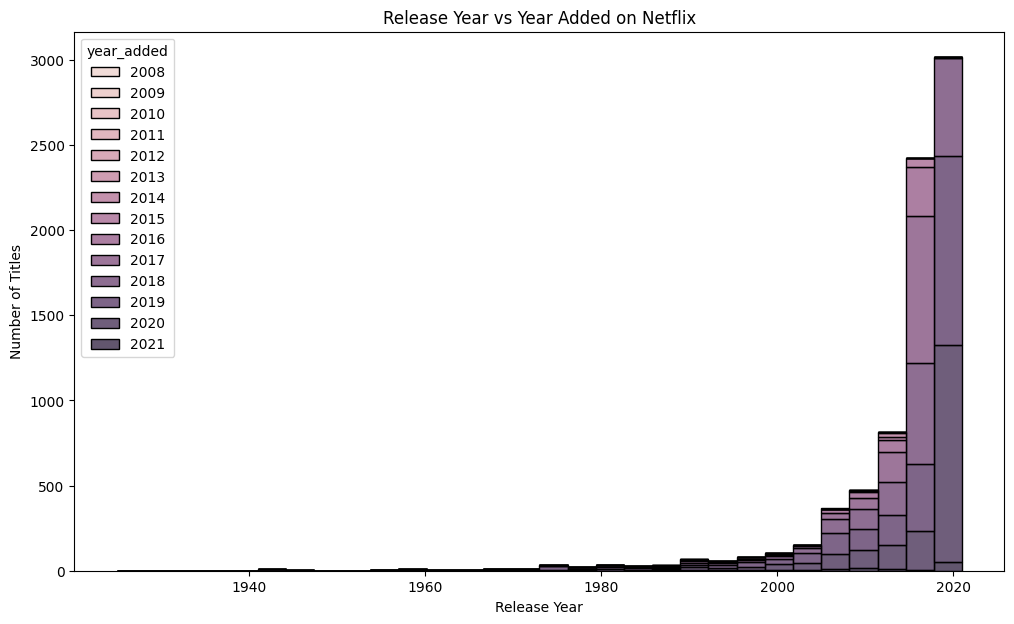

In [114]:
plt.figure(figsize=(12,7))
sns.histplot(data=net_df, x='release_year', hue='year_added', multiple='stack', bins=30)
plt.title("Release Year vs Year Added on Netflix")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.show()


Key Insights:

Most titles added to Netflix are from recent release years (2010 onward)

Some older movies (1980s, 1990s) were added, but in smaller numbers → Netflix focuses more on new content

Sharp growth after ~2015 shows Netflix ramping up Original productions, reducing dependency on licensing older films

Q5: Top genres on Netflix (Movies vs TV Shows)

In [115]:
genres = net_df.assign(genre=net_df['listed_in'].str.split(', ')).explode('genre')


top_genres = genres['genre'].value_counts().head(10)
top_genres


genre
International Movies        2437
Dramas                      2105
Comedies                    1471
International TV Shows      1197
Documentaries                786
Action & Adventure           721
TV Dramas                    703
Independent Movies           673
Children & Family Movies     532
Romantic Movies              531
Name: count, dtype: int64

In [116]:
type_genres = genres.groupby(['type', 'genre']).size().reset_index(name='count')

top_movie_genres = type_genres[type_genres['type']=='Movie'].sort_values(by='count', ascending=False).head(10)
top_tv_genres = type_genres[type_genres['type']=='TV Show'].sort_values(by='count', ascending=False).head(10)

print("Top Movie Genres:\n", top_movie_genres)
print("\nTop TV Show Genres:\n", top_tv_genres)


Top Movie Genres:
      type                     genre  count
11  Movie      International Movies   2437
7   Movie                    Dramas   2105
4   Movie                  Comedies   1471
6   Movie             Documentaries    786
0   Movie        Action & Adventure    721
10  Movie        Independent Movies    673
2   Movie  Children & Family Movies    532
15  Movie           Romantic Movies    531
19  Movie                 Thrillers    491
18  Movie           Stand-Up Comedy    329

Top TV Show Genres:
        type                   genre  count
25  TV Show  International TV Shows   1197
35  TV Show               TV Dramas    703
34  TV Show             TV Comedies    517
23  TV Show          Crime TV Shows    426
26  TV Show                Kids' TV    411
24  TV Show              Docuseries    352
29  TV Show       Romantic TV Shows    333
21  TV Show        British TV Shows    231
28  TV Show              Reality TV    222
27  TV Show         Korean TV Shows    150


In [117]:
type_genres = genres.groupby(['type', 'genre']).size().reset_index(name='count')

top_movie_genres = type_genres[type_genres['type']=='Movie'].sort_values(by='count', ascending=False).head(10)
top_tv_genres = type_genres[type_genres['type']=='TV Show'].sort_values(by='count', ascending=False).head(10)

print("Top Movie Genres:\n", top_movie_genres)
print("\nTop TV Show Genres:\n", top_tv_genres)


Top Movie Genres:
      type                     genre  count
11  Movie      International Movies   2437
7   Movie                    Dramas   2105
4   Movie                  Comedies   1471
6   Movie             Documentaries    786
0   Movie        Action & Adventure    721
10  Movie        Independent Movies    673
2   Movie  Children & Family Movies    532
15  Movie           Romantic Movies    531
19  Movie                 Thrillers    491
18  Movie           Stand-Up Comedy    329

Top TV Show Genres:
        type                   genre  count
25  TV Show  International TV Shows   1197
35  TV Show               TV Dramas    703
34  TV Show             TV Comedies    517
23  TV Show          Crime TV Shows    426
26  TV Show                Kids' TV    411
24  TV Show              Docuseries    352
29  TV Show       Romantic TV Shows    333
21  TV Show        British TV Shows    231
28  TV Show              Reality TV    222
27  TV Show         Korean TV Shows    150


C:\Users\K. SHIVAIAH\AppData\Local\Temp\ipykernel_19008\1445795733.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_movie_genres, x='count', y='genre', palette='Blues_r', ax=axes[0])
C:\Users\K. SHIVAIAH\AppData\Local\Temp\ipykernel_19008\1445795733.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_tv_genres, x='count', y='genre', palette='Greens_r', ax=axes[1])


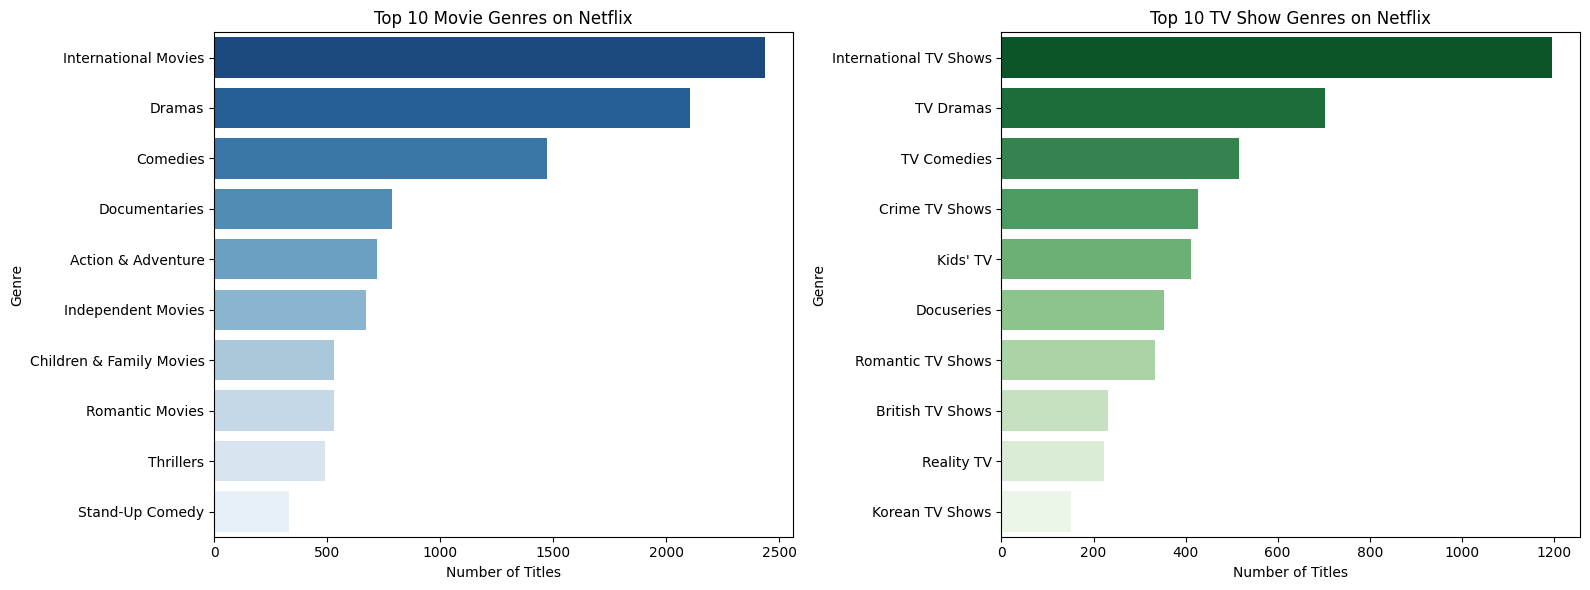

In [118]:
fig, axes = plt.subplots(1, 2, figsize=(16,6), sharex=False)

sns.barplot(data=top_movie_genres, x='count', y='genre', palette='Blues_r', ax=axes[0])
axes[0].set_title("Top 10 Movie Genres on Netflix")
axes[0].set_xlabel("Number of Titles")
axes[0].set_ylabel("Genre")

sns.barplot(data=top_tv_genres, x='count', y='genre', palette='Greens_r', ax=axes[1])
axes[1].set_title("Top 10 TV Show Genres on Netflix")
axes[1].set_xlabel("Number of Titles")
axes[1].set_ylabel("Genre")

plt.tight_layout()
plt.show()


Key Insights:

Movies → Top genres are usually Dramas, Documentaries, and Comedies.

TV Shows → Dominated by International TV, Kids’ TV, and Reality TV.

Strategy → Netflix pushes varied genres but emphasizes regional TV shows to attract local audiences.

In [119]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Netflix Dataset Profiling Report", explorative=True)


profile.to_file("netflix_profiling_report.html")


C:\Users\K. SHIVAIAH\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 77.69it/s]
